In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
sns.set(style="darkgrid")
#
#数据查询data=tips.query("day != 'Sat'")
##order x轴排序

In [ ]:
#1变量关系
#散点图
tips = sns.load_dataset('tips')
#分类：hue，style，row, col,size
sns.relplot(x="total_bill", y="tip", kind="line", hue="tip",col='smoker',size='size',sizes=(15, 200),data=tips);#hue 颜色分类，style

In [ ]:
#线图
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
#排序：sort
g = sns.relplot(x="time", y="value", sort=False, kind="line", data=df)
g.fig.autofmt_xdate()

In [ ]:
fmri = sns.load_dataset("fmri")
#一对多
#ci:置信区间 (sd一个标准差）
#estimator=None：关闭聚合操作(默认均值线加95%置信区间)
#palette调色板
sns.relplot(x="timepoint", y="signal",
            kind="line",units="subject",hue='subject',estimator=None, data=fmri.query("event == 'stim'"));

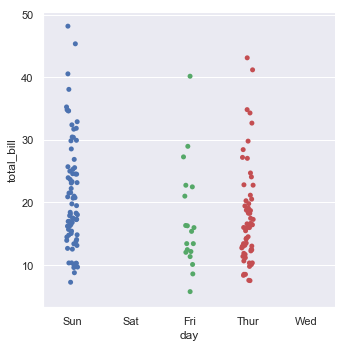

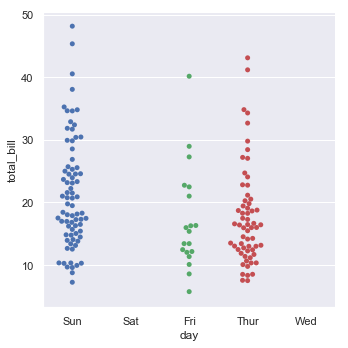

In [174]:
#2分类数据
#2.1分类散点图 strip，swarm
tips = sns.load_dataset("tips")
#jitter数据偏移
sns.catplot(x="day", y="total_bill", order=["Sun", "Sat","Fri","Thur","Wed"],kind="strip",data=tips.query("day != 'Sat'"));
sns.catplot(x="day", y="total_bill", order=["Sun", "Sat","Fri","Thur","Wed"],kind="swarm",data=tips.query("day != 'Sat'"));

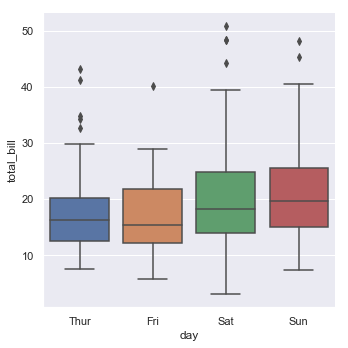

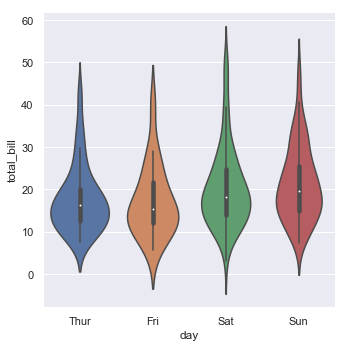

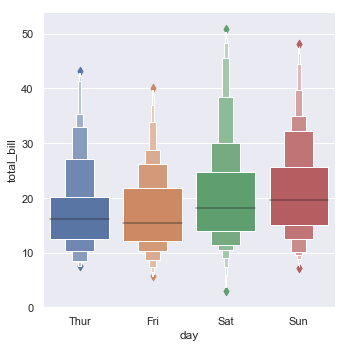

In [175]:
#2.2分类分布图 box，violin，boxen
sns.catplot(x="day", y="total_bill", kind="box", data=tips);
sns.catplot(x="day", y="total_bill", kind="violin", data=tips);
sns.catplot(x="day", y="total_bill", kind="boxen", data=tips);

In [ ]:
#2.3分类统计估计图point,bar,count
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="point",data=titanic);
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);
sns.catplot(x="sex",  hue="survived", kind="count", data=titanic);

In [ ]:
#3数据集的分布
#3.1一元分布的可视化 直方图dist，核密度估计kde，拟合指定的分布fit
x = np.random.normal(size=100)
sns.distplot(x, kde=True,rug=True);

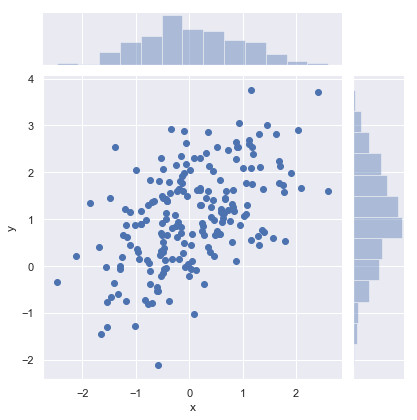

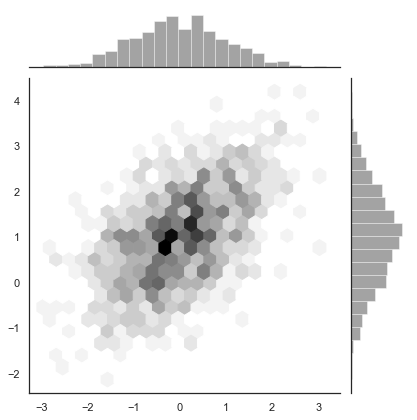

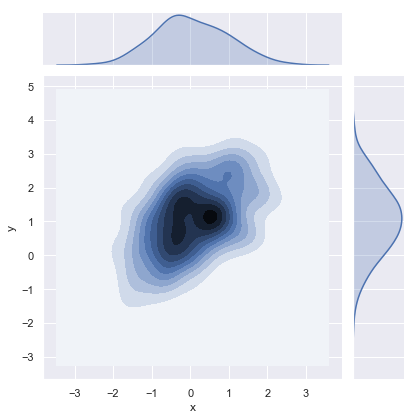

In [176]:
#3.2二元分布可视化 散点图，六边形，核密度估计
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df);
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k")
sns.jointplot(x="x", y="y", data=df, kind="kde");

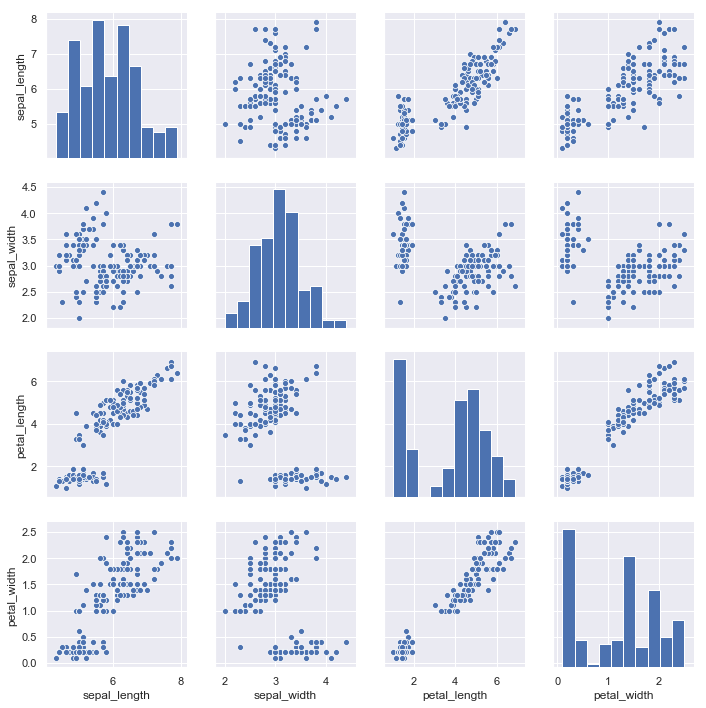

In [178]:
#3.3成对关系的可视化
iris = sns.load_dataset("iris")
sns.pairplot(iris);

''

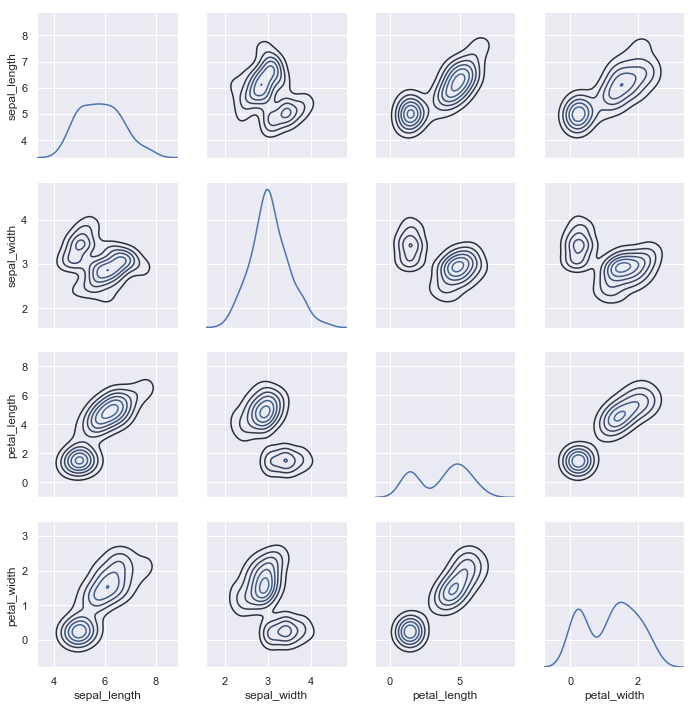

In [177]:
g = sns.PairGrid(iris)
# 在对角线上的坐标轴内画图
g.map_diag(sns.kdeplot)
# 在非对角线上的坐标轴内画图
g.map_offdiag(sns.kdeplot, n_levels=6);""

In [ ]:
#4线性关系的展示
sns.regplot(x="total_bill", y="tip", data=tips);
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);
anscombe = sns.load_dataset("anscombe")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
        robust=True,  ci=None, scatter_kws={"s": 80});

In [ ]:
#5多图网格
g = sns.FacetGrid(tips, col="time")
g.map(plt.hist, "tip");

In [ ]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

In [ ]:
g = sns.PairGrid(iris)
g.map(plt.scatter);

In [ ]:
#6美化图形
#6.1设计风格 darkgrid, whitegrid, dark, white, ticks
sns.set_style("whitegrid")
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()


In [ ]:
#6.2去除图形边线
sinplot()
sns.despine()

In [ ]:
#6.3临时修改设计风格
f = plt.figure()
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(1, 2, 1)
    sinplot()
ax = f.add_subplot(1, 2, 2)
sinplot(-1)

In [ ]:
#6.4重载seaborn的设计元素
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

In [ ]:
#6.5缩放图形元素有小到大paper、notebook、talk和poster
sns.set_context("poster")
sinplot()


In [ ]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()